# Quasi Monte Carlo tests

- Available julia packages
- Mappings from the unit hypercube to the n-simplex
- Inch-worm diagram times

# SciML/QuasiMonteCarlo.jl

<https://github.com/SciML/QuasiMonteCarlo.jl>

In [5]:
import QuasiMonteCarlo; qmc = QuasiMonteCarlo
import Distributions

In [55]:
d = 2
N = 512
X = qmc.sample(N, zeros(d), ones(d), qmc.SobolSample())

2×512 Array{Float64,2}:
 0.50293   0.75293      0.25293   …  0.500977  0.000976562  0.00146484
 0.750977  0.000976562  0.500977     0.25293   0.75293      0.376465

# stevengj/Sobol.jl

<https://github.com/stevengj/Sobol.jl>

In [56]:
import Sobol; sb = Sobol

s = sb.SobolSeq(d)
Y = hcat([sb.next!(s) for i = 1:N]...)

2×512 Array{Float64,2}:
 0.5  0.75  0.25  0.375  0.875  0.625  …  0.501953    0.00195312  0.00292969
 0.5  0.25  0.75  0.375  0.875  0.125     0.00195312  0.501953    0.250977

# Visualization

In [57]:
import PyCall; PyCall.pygui(:tk);
import PyPlot; const plt = PyPlot; plt.pygui(false); plt.svg(true);

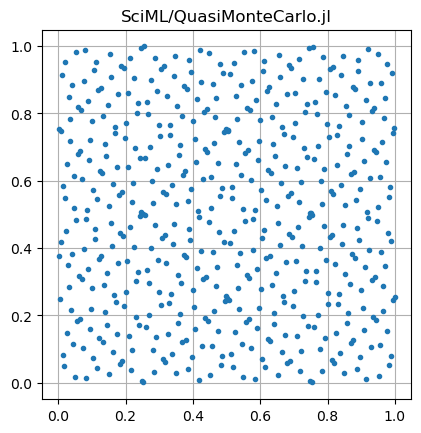

In [58]:
plt.title("SciML/QuasiMonteCarlo.jl")
plt.plot(X[1, :], X[2, :], "."); plt.axis("square"); plt.grid(true);

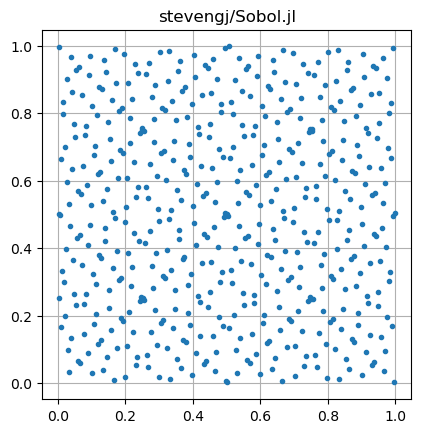

In [59]:
plt.title("stevengj/Sobol.jl")
plt.plot(Y[1, :], Y[2, :], "."); plt.axis("square"); plt.grid(true);

In [37]:
import Test.@test
#@test X ≈ Y

# Transforms to the simplex

<https://doi.org/10.1016/j.cam.2004.03.019>

Here using the `sort` transformation.

In [61]:
Xt = sort(X, dims=1)
Yt = sort(Y, dims=1)

2×512 Array{Float64,2}:
 0.5  0.25  0.25  0.375  0.875  0.125  …  0.00195312  0.00195312  0.00292969
 0.5  0.75  0.75  0.375  0.875  0.625     0.501953    0.501953    0.250977

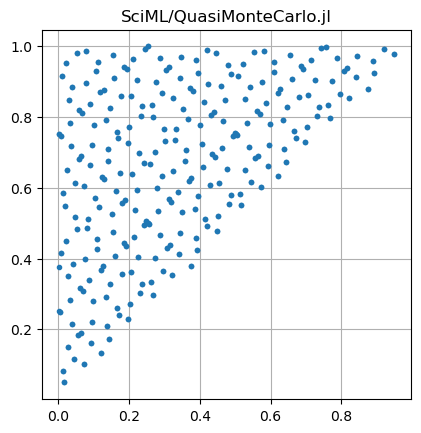

In [62]:
plt.title("SciML/QuasiMonteCarlo.jl")
plt.plot(Xt[1, :], Xt[2, :], "."); plt.axis("square"); plt.grid(true);

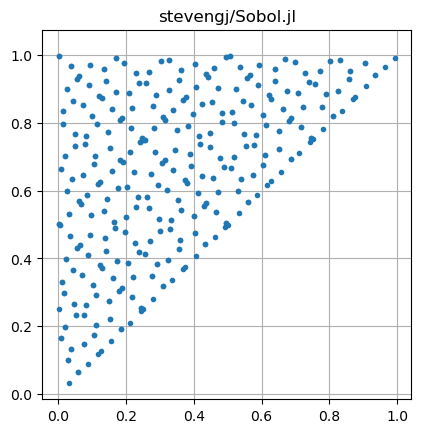

In [64]:
plt.title("stevengj/Sobol.jl")
plt.plot(Yt[1, :], Yt[2, :], "."); plt.axis("square"); plt.grid(true);

# Inch-worm diagram sampling

The time variables in an inch worm diagram will be slightly more complicated than the unit cube and unit simplex.

Let the solution be known until $\bar{t}$ and study a single hybridization insertion
$$
\hat{O}_a(t) \Delta_{ab}(t, t') \hat{O}_b
$$ 
The weight of this configuration will then be given by
$$
\Delta_{ab}(t, t') \cdot 
\left[ \hat{G}(0, t) \hat{O}_a \hat{G}(t, \bar{t}) \hat{G}_0(\bar{t}, t') \hat{O}_b(t') \right]
$$

where the hybridization times $t,t'$ are limited to $0 < t < \bar{t} < t' < t_{\text{max}}$.

- How does the tree legs of the contour enter here?

## Mapping to two simplices

The diagram times at earlier times $t_i < \bar{t}$, where we know $\hat{G}$, are separate from the diagram times at later times $t'_k > \bar{t}$.

However, one sampling strategy is to limit $t_i , \, \forall i = 1, \dots , N$  to the simplex on $[0, \bar{t}]$ and $t'_k, \, \forall k = 1, \dots, M$ to a simplex on $[\bar{t}, t_{\text{max}}]$.

In [69]:
t0 = 0.
tbar = 2.
tmax = 3.

N = 512
d1 = d2 = 2

ti = sort(qmc.sample(N, t0 * ones(d1), tbar * ones(d1), qmc.SobolSample()), dims=1);
tk = sort(qmc.sample(N, tbar * ones(d2), tmax * ones(d2), qmc.SobolSample()), dims=1);

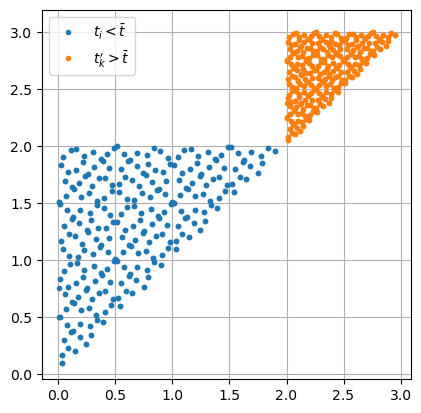

In [80]:
plt.plot(ti[1,:], ti[2,:], ".", label=plt.L"$t_i < \bar{t}$")
plt.plot(tk[1,:], tk[2,:], ".", label=plt.L"$t_k' > \bar{t}$")
plt.axis("square"); plt.grid(true); plt.legend(loc="best");